In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,"16,884.92"
1,18,male,33.77,1,no,southeast,"1,725.55"
2,28,male,33.00,3,no,southeast,"4,449.46"
3,33,male,22.70,0,no,northwest,"21,984.47"
4,32,male,28.88,0,no,northwest,"3,866.86"


In [3]:
df.loc[9]

age                60
sex            female
bmi             25.84
children            0
smoker             no
region      northwest
charges     28,923.14
Name: 9, dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.duplicated().sum()

1

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.describe()

,age,bmi,children,charges
count,"1,337.00","1,337.00","1,337.00","1,337.00"
mean,39.22,30.66,1.10,"13,279.12"
std,14.04,6.10,1.21,"12,110.36"
min,18.00,15.96,0.00,"1,121.87"
25%,27.00,26.29,0.00,"4,746.34"
50%,39.00,30.40,1.00,"9,386.16"
75%,51.00,34.70,2.00,"16,657.72"
max,64.00,53.13,5.00,"63,770.43"


In [9]:
df.describe(include="object")

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


# Univariate Analysis

In [10]:
num_cols = df.select_dtypes(exclude="object").columns
for col in num_cols:
    fig = px.histogram(df, x=col, color='smoker', marginal="box", width=800, title=f"{col} Distribution by Smoker")
    fig.show()


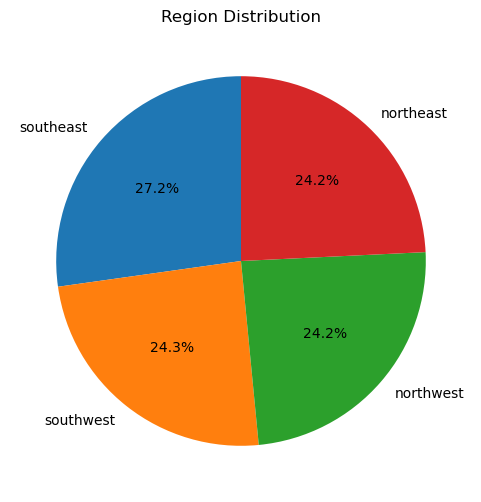

In [11]:
import matplotlib.pyplot as plt

# 2. Pie chart: Region distribution
region_counts = df['region'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Region Distribution')
plt.show()


In [12]:
cat_cols = df.select_dtypes(include=['object']).columns


for col in cat_cols:
    data = df[col].value_counts().reset_index()
    data.columns = [col, 'count']
    px.pie(data, values='count', names=col, title = col, width=600).show()

# Multivariate Analysis

In [13]:
px.scatter(df, x='smoker', y='charges', color='smoker', width=800)

In [14]:
px.scatter(df, x='bmi', y='charges', color='smoker', width=800)

In [15]:
grouped_by_smoker = df.groupby('smoker').median(numeric_only=True)
print("Median values grouped by smoker:\n", grouped_by_smoker)

Median values grouped by smoker:
          age   bmi  children   charges
smoker                                
no     40.00 30.30      1.00  7,345.73
yes    38.00 30.45      1.00 34,456.35


In [16]:
df.groupby('sex')['charges'].median()

sex
female   9,412.96
male     9,377.90
Name: charges, dtype: float64

In [17]:
df.groupby('smoker')['charges'].median()

smoker
no     7,345.73
yes   34,456.35
Name: charges, dtype: float64

In [18]:
df.groupby('region')['charges'].median()

region
northeast   10,057.65
northwest    8,976.98
southeast    9,294.13
southwest    8,798.59
Name: charges, dtype: float64

In [19]:
df.groupby('children')['charges'].median()

children
0    9,863.47
1    8,483.87
2    9,264.98
3   10,600.55
4   11,033.66
5    8,589.57
Name: charges, dtype: float64

In [20]:
pd.pivot_table(df, index='sex', columns='smoker', values='charges', aggfunc='median')

smoker,no,yes
sex,,
female,"7,639.42","28,950.47"
male,"6,986.10","36,085.22"


In [21]:
pd.pivot_table(df, index='region', columns='smoker', values='charges', aggfunc='median')

smoker,no,yes
region,,
northeast,"8,342.91","28,101.33"
northwest,"7,259.23","27,489.00"
southeast,"6,652.53","37,484.45"
southwest,"7,348.14","35,165.26"


In [22]:
pd.pivot_table(df, index='children', columns='smoker', values='charges', aggfunc='median')

smoker,no,yes
children,,
0,"6,185.72","33,900.65"
1,"7,050.64","34,806.47"
2,"7,726.85","38,344.57"
3,"8,530.15","32,787.46"
4,"10,996.19","21,472.48"
5,"8,582.30","19,023.26"


In [23]:
px.imshow(df.corr(numeric_only=True).round(2), text_auto=True)

# Data Preprocessing

In [24]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,"16,884.92"
1,18,male,33.77,1,no,southeast,"1,725.55"
2,28,male,33.00,3,no,southeast,"4,449.46"
3,33,male,22.70,0,no,northwest,"21,984.47"
4,32,male,28.88,0,no,northwest,"3,866.86"


In [25]:
num_cols

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [26]:
num_cols = num_cols.to_list()
num_cols.remove('charges')

In [27]:
num_cols

['age', 'bmi', 'children']

In [28]:
cat_cols = cat_cols.to_list()
# cat_cols.remove('region')
cat_cols

['sex', 'smoker', 'region']

In [29]:
X=df.drop('charges',axis=1)
y=df['charges'].copy()

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
sc = StandardScaler()
ohe = OneHotEncoder(drop='first', sparse_output=False)
preprocessor = ColumnTransformer([
    ('scaler', sc, num_cols),
    ('ohe', ohe, cat_cols)
]).set_output(transform='pandas')
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42)) 
])
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [33]:
# Evaluate
y_pred = model_pipeline.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.8782485052664795


In [34]:
X_train_prep.head()

,scaler__age,scaler__bmi,scaler__children,ohe__sex_male,ohe__smoker_yes,ohe__region_northwest,ohe__region_southeast,ohe__region_southwest
1114,-1.16,-1.00,-0.91,1.00,0.00,0.00,0.00,0.00
968,-1.30,-0.79,0.77,1.00,0.00,0.00,0.00,0.00
599,0.91,1.15,0.77,0.00,0.00,1.00,0.00,0.00
170,1.70,1.81,-0.91,1.00,0.00,0.00,1.00,0.00
275,0.56,-0.65,0.77,0.00,0.00,0.00,0.00,0.00


# Modelling

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

# Full pipeline with model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))  # or LinearRegression()
])

# Fit the pipeline
model_pipeline.fit(X_train, y_train)
# Evaluate
y_pred = model_pipeline.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))


R² Score: 0.8782485052664795


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
scores = cross_val_score(lr, X_train_prep, y_train, cv=5)
scores.mean()

0.725757353610811

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(random_state=42)
scores = cross_val_score(rf, X_train_prep, y_train, cv=5)
print(scores.mean())

0.8201386381353789


In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
svr = SVR()
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('svr', svr)
])

param_grid = {
    'svr__kernel': ['linear', 'rbf', 'poly'],
    'svr__C': [0.1, 1, 10],
    'svr__epsilon': [0.1, 0.2, 0.5],
    'svr__gamma': ['scale', 'auto'],
    'svr__degree': [2, 3, 4]  
}

In [39]:
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print("Best Parameters:", grid.best_params_)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Best Parameters: {'svr__C': 10, 'svr__degree': 2, 'svr__epsilon': 0.1, 'svr__gamma': 'scale', 'svr__kernel': 'linear'}
RMSE: 13722.218507988038


In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
models = {
    'Linear Regression': LinearRegression(),
}

for name, model in models.items():
    scores = cross_val_score(model, X_train_prep, y_train, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-scores)
    print(f'{name}: {rmse_scores.mean()}')

Linear Regression: 6113.877600907739


In [41]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [10, 12]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_prep, y_train)

best_model = grid_search.best_estimator_
best_rmse = np.sqrt(-grid_search.best_score_)

In [42]:
best_rmse

4643.961455195091

In [43]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_split': 10}

In [44]:
from sklearn.metrics import root_mean_squared_error, r2_score

best_model.fit(X_train_prep, y_train)

y_pred_train = best_model.predict(X_train_prep)
rmse_train = root_mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
print(f'RMSE of Train: {rmse_train}')
print(f'R2 of Train: {r2_train}')

RMSE of Train: 4098.450553884428
R2 of Train: 0.8773155796385842


In [45]:
y_pred_test = best_model.predict(X_test_prep)
rmse_test = root_mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print(f'RMSE of Test: {rmse_test}')
print(f'R2 of Test: {r2_test}')

RMSE of Test: 4255.184986746795
R2 of Test: 0.9014639360832981


In [46]:
pd.DataFrame(zip(X_train_prep.columns, best_model.feature_importances_), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)

,Feature,Importance
4,ohe__smoker_yes,0.68
1,scaler__bmi,0.18
0,scaler__age,0.12
2,scaler__children,0.01
5,ohe__region_northwest,0.00
7,ohe__region_southwest,0.00
6,ohe__region_southeast,0.00
3,ohe__sex_male,0.00


In [47]:
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', best_model)
])

model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

RMSE: 4255.184986746795
R2: 0.9014639360832981


In [48]:
import joblib
joblib.dump(model_pipeline, 'charges_model.joblib')

['charges_model.joblib']

In [49]:
df.to_csv('cleaned_data.csv', index=False)